In [231]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
warnings.filterwarnings("ignore")

In [233]:
df = pd.read_csv('../data/classifier/original/df_exp.csv', sep = ';', encoding = 'iso-8859-1')

In [234]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Race,Height,Weight
0,40.000000,M,ATA,140.000000,289.000000,0,Normal,172.000000,N,0.000000,Up,1,White,180.233238,100.825018
1,49.000000,F,NAP,160.000000,180.000000,0,Normal,156.000000,N,1.000000,Flat,0,White,173.975042,63.384922
2,37.000000,M,ATA,130.000000,283.000000,0,ST,98.000000,N,0.000000,Up,1,Hispanic,171.904901,83.027778
3,48.000000,F,ASY,138.000000,214.000000,0,Normal,108.000000,Y,1.500000,Flat,1,White,160.074206,66.458538
4,54.000000,M,NAP,150.000000,195.000000,0,Normal,122.000000,N,0.000000,Up,0,White,177.775159,84.033176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8913,74.348939,M,ASY,132.345049,265.740009,1,Normal,107.915513,N,2.050618,Flat,1,White,170.353192,83.396686
8914,56.593558,F,NAP,103.611499,100.000000,1,ST,83.143461,Y,0.640167,Flat,1,Asian,157.483662,70.929937
8915,45.634776,F,NAP,109.322571,185.269840,0,ST,104.331383,Y,0.200622,Flat,0,White,172.187920,101.653112
8916,69.096970,M,NAP,134.907200,238.968085,0,Normal,166.609687,Y,2.326140,Flat,1,Black,166.576961,58.821763


<span style="font-family: Georgia, serif;">

# Exploration and exploratory data analysis

</span>

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

## Graphics
</span>

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Age
</span>

In [235]:
hist_age = px.histogram(data_frame= df, x = "Age", nbins = 60, color_discrete_sequence=["royalblue"])
hist_age.update_layout(
    title="Age Distribution",
    xaxis_title="Age", yaxis_title="Count",
    width=700, height=500,
    bargap=0.05, bargroupgap=0.1,
    font=dict(size=12), title_font_size=24, 
    title_font_family="Arial", title_font_color="navy",
    xaxis=dict(
        tickmode="linear", tick0=0,
        dtick=10, gridcolor="lightgrey",),
    yaxis=dict(gridcolor="lightgrey",),
)
hist_age.show()

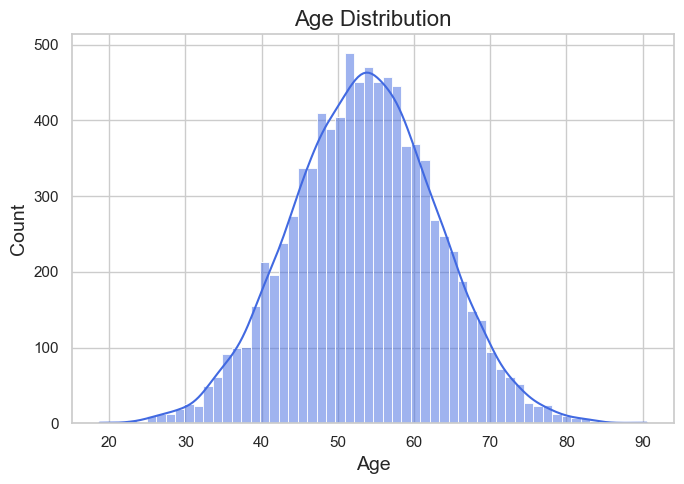

In [236]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Age', color='royalblue', kde=True, stat='count')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Gender
</span>

In [237]:
df.Sex.value_counts()

Sex
M    7011
F    1907
Name: count, dtype: int64

In [238]:
colors = ["#6495ED", "#FF69B4"]
countplot_sex = px.histogram(df, x='Sex', color='Sex', title='Gender Count', color_discrete_sequence=colors)
countplot_sex.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count',
    showlegend=True,
    width=700,
    height=500,
    title_font_size=16,
    font=dict(size=12),
)
countplot_sex.show()

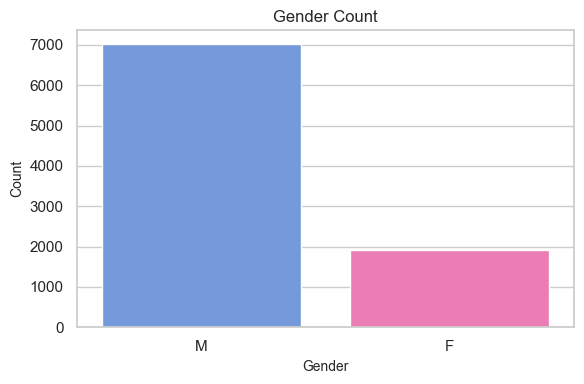

In [239]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Sex', data=df, palette=colors, dodge=False, legend=True)
plt.title('Gender Count', fontsize=12)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend([], frameon=False)
plt.tight_layout()
plt.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Race
</span>

In [240]:
df['Race'].value_counts()

Race
White       6251
Black       1300
Hispanic     627
Asian        487
Other        253
Name: count, dtype: int64

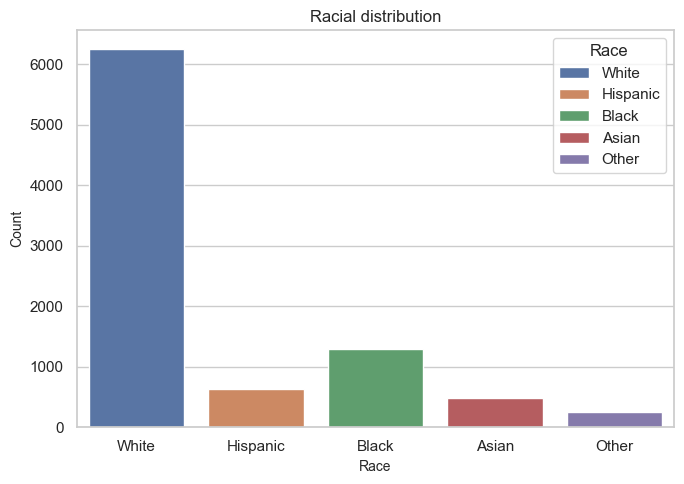

In [241]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Race', data=df,hue ='Race', dodge=False, legend=True)
plt.title('Racial distribution', fontsize=12)
plt.xlabel('Race', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

In [242]:
countplot_Race = px.histogram(df, x='Race', color='Race', title='Racial distribution')
countplot_Race.update_layout(
    xaxis_title='Race',
    yaxis_title='Count',
    width=700,
    height=500,
    title_font_size=16,
    font=dict(size=12),
)
countplot_Race.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Chest Pain Type
</span>

<span style="font-family: Tahoma, sans-serif; font-size: 13px; font-weight: 100; letter-spacing: 0.8px;">

#### Values
**TA (Typical Angina)**
- Definition: Typical angina refers to chest pain or discomfort that occurs when the heart does not receive enough oxygen.

**ATA (Atypical Angina)**:
- Definition: Atypical angina refers to chest pain that does not follow the typical angina pattern.

**NAP (Non-Anginal Chest Pain)**:
- Definition: Refers to chest pain that is not caused by angina.

**ASY (Asymptomatic)**:
- Definition: Refers to patients who do not have symptoms of chest pain, even though they may have underlying heart problems.
</span>

In [243]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    4751
NAP    2000
ATA    1683
TA      484
Name: count, dtype: int64

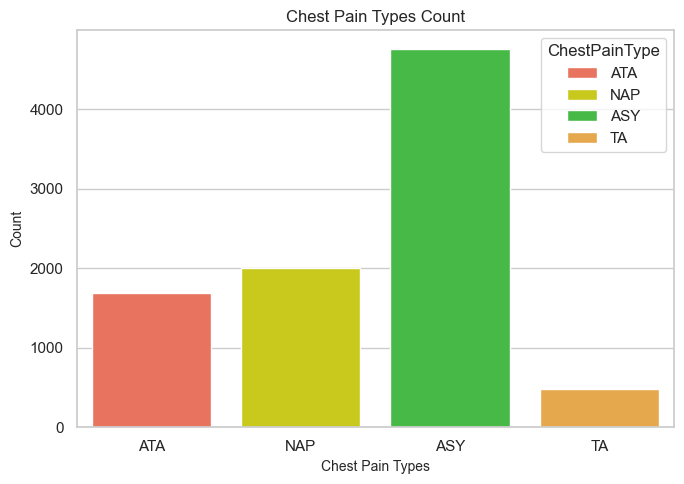

In [244]:
colors = {
    "TA": "#ffad33",  
    "ATA": "#FF6347", 
    "NAP": "#e6e600", 
    "ASY": "#33cc33"
}
plt.figure(figsize=(7, 5))
sns.countplot(x='ChestPainType', data=df,hue ='ChestPainType',  palette=colors, dodge=False, legend=True)
plt.title('Chest Pain Types Count', fontsize=12)
plt.xlabel('Chest Pain Types', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

In [245]:
countplot_chest_pain = px.histogram(df, x='ChestPainType', color='ChestPainType', title='Chest Pain Types Count', color_discrete_map=colors)
countplot_chest_pain.update_layout(
    xaxis_title='Chest Pain Types',
    yaxis_title='Count',
    width=700,
    height=500,
    title_font_size=16,
    font=dict(size=12),
)
countplot_chest_pain.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Resting BP
</span>

In [246]:
df['RestingBP'].value_counts().sort_index()

RestingBP
0.000000       1
80.000000     16
80.225070      1
80.307506      1
80.438595      1
              ..
190.840423     1
191.884423     1
192.000000     1
199.209976     1
200.000000     5
Name: count, Length: 8051, dtype: int64

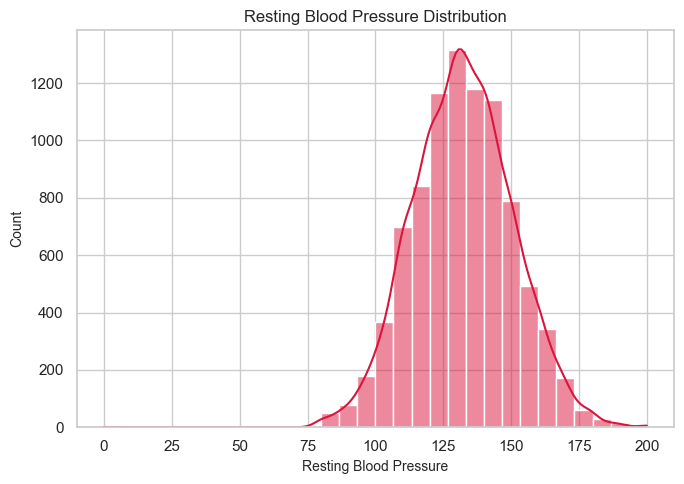

In [247]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='RestingBP', bins=30, color='crimson', kde=True, stat='count')
plt.title('Resting Blood Pressure Distribution', fontsize=12)
plt.xlabel('Resting Blood Pressure', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Cholesterol
</span>

In [248]:
df['Cholesterol'].value_counts()

Cholesterol
100.000000    1537
0.000000       172
254.000000      11
223.000000      10
220.000000      10
              ... 
201.048870       1
164.695558       1
173.754313       1
286.032750       1
238.968085       1
Name: count, Length: 6686, dtype: int64

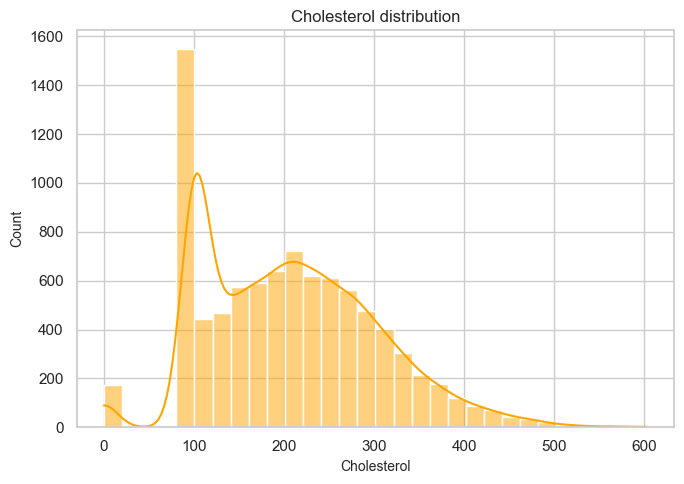

In [249]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Cholesterol', bins=30, color='orange', kde=True, stat='count')
plt.title('Cholesterol distribution', fontsize=12)
plt.xlabel('Cholesterol', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Fasting BS
</span>

In [250]:
df['FastingBS'].value_counts()

FastingBS
0    6885
1    2033
Name: count, dtype: int64

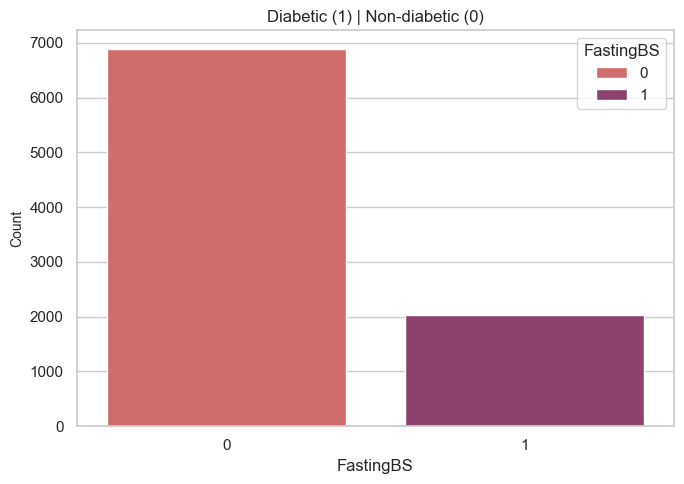

In [251]:
plt.figure(figsize=(7, 5))
sns.countplot(x='FastingBS', hue='FastingBS', data=df, palette='flare', dodge=False, legend=True)
plt.title('Diabetic (1) | Non-diabetic (0)', fontsize=12)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Resting ECG
</span>

<span style="font-family: Tahoma, sans-serif; font-size: 13px; font-weight: 100; letter-spacing: 0.8px;">

#### Values
**Normal**:
- Definition: This category indicates that the patient's resting electrocardiogram (ECG) is normal, with no detectable abnormalities.

**ST**:
- Definition: Refers to abnormalities in the ST-T segment, such as ST segment inversion.

**NAP (Non-Anginal Chest Pain)**:
- Definition: Refers to chest pain that is not caused by angina.

**LVH (Left Ventricular Hypertrophy)**:
- Definition: This category indicates the presence of left ventricular hypertrophy, which is the thickening of the walls of the left ventricle of the heart.
</span>

In [252]:
df['RestingECG'].value_counts()

RestingECG
Normal    5333
LVH       1804
ST        1781
Name: count, dtype: int64

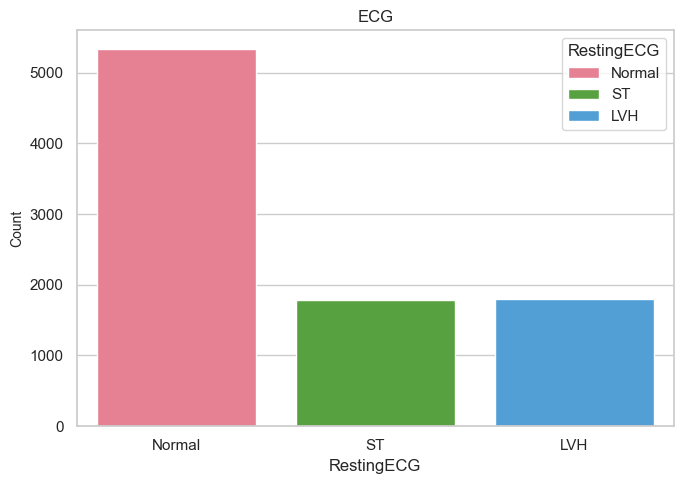

In [253]:
plt.figure(figsize=(7, 5))
sns.countplot(x='RestingECG', hue='RestingECG', data=df, palette='husl', dodge=False, legend=True)
plt.title('ECG', fontsize=12)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Max HR
</span>

In [254]:
df['MaxHR'].value_counts()

MaxHR
150.000000    43
140.000000    41
202.000000    37
120.000000    36
130.000000    33
              ..
160.385062     1
166.639439     1
160.377761     1
118.913636     1
118.679778     1
Name: count, Length: 8063, dtype: int64

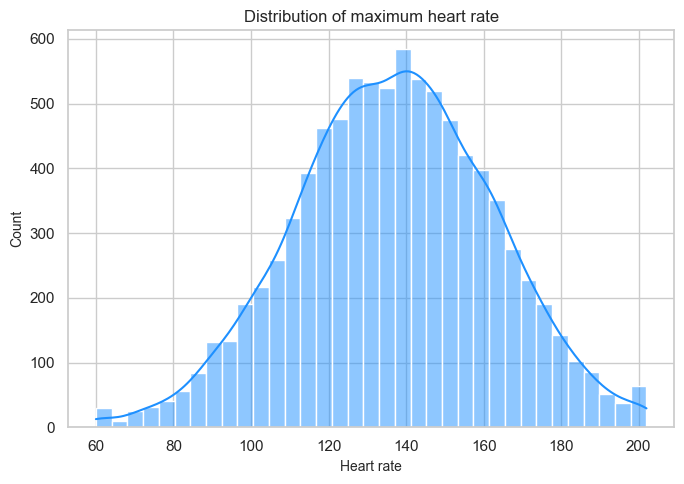

In [255]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='MaxHR', bins=35, color='dodgerblue', kde=True, stat='count')
plt.title('Distribution of maximum heart rate', fontsize=12)
plt.xlabel('Heart rate', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Exercise Angina
</span>

In [256]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    5327
Y    3591
Name: count, dtype: int64

In [257]:
pie_chart = px.pie(df, 'ExerciseAngina')
pie_chart.update_layout(
    title='Exercise-Induced Angina Proportion',
    width=700,
    height=500,
    title_font_size=16,
    font=dict(size=12),
    showlegend=True,
)
pie_chart.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Old Peak
</span>

In [258]:
df['Oldpeak'].value_counts()

Oldpeak
0.000000    1976
1.000000      86
2.000000      76
1.500000      53
3.000000      28
            ... 
1.957389       1
1.438209       1
1.018329       1
0.242062       1
1.101679       1
Name: count, Length: 6445, dtype: int64

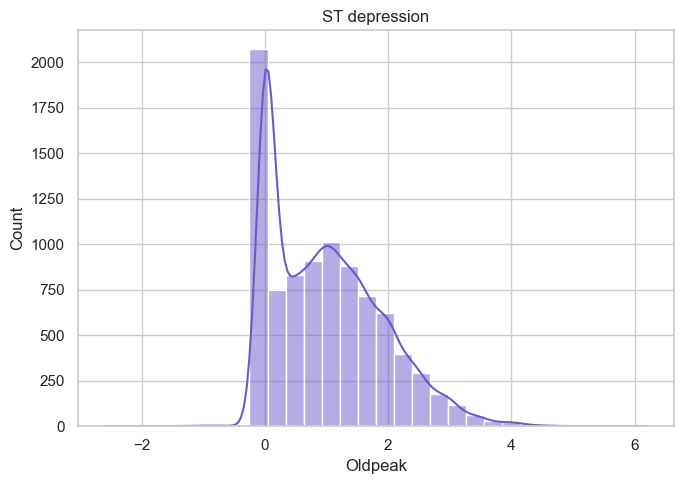

In [259]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Oldpeak', bins=30, color='slateblue', kde=True, stat='count')
plt.title('ST depression', fontsize=12)
plt.tight_layout()
plt.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### ST Slope
</span>

In [260]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    4480
Up      3847
Down     591
Name: count, dtype: int64

In [261]:
pie_chart = px.pie(df, 'ST_Slope')
pie_chart.update_layout(
    title='Inclination',
    width=700,
    height=500,
    title_font_size=16,
    font=dict(size=12),
    showlegend=True,
)
pie_chart.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Weight
</span>

In [262]:
df['Weight'].value_counts()

Weight
100.825018    1
90.771434     1
87.226787     1
109.139725    1
84.921682     1
             ..
106.022167    1
57.664780     1
86.065532     1
82.213353     1
60.772571     1
Name: count, Length: 8918, dtype: int64

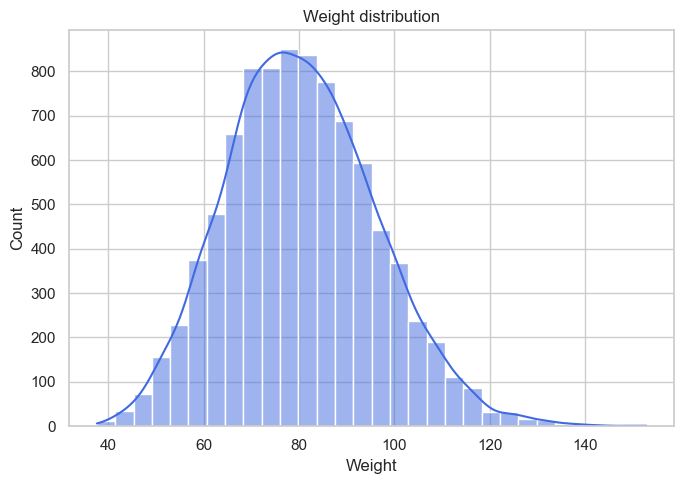

In [263]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Weight', bins=30, color='royalblue', kde=True, stat='count')
plt.title('Weight distribution', fontsize=12)
plt.tight_layout()
plt.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Height
</span>

In [264]:
df['Height'].value_counts()

Height
180.233238    1
163.919595    1
180.855010    1
189.461530    1
178.575325    1
             ..
176.982206    1
160.471087    1
176.919570    1
171.079755    1
166.710481    1
Name: count, Length: 8918, dtype: int64

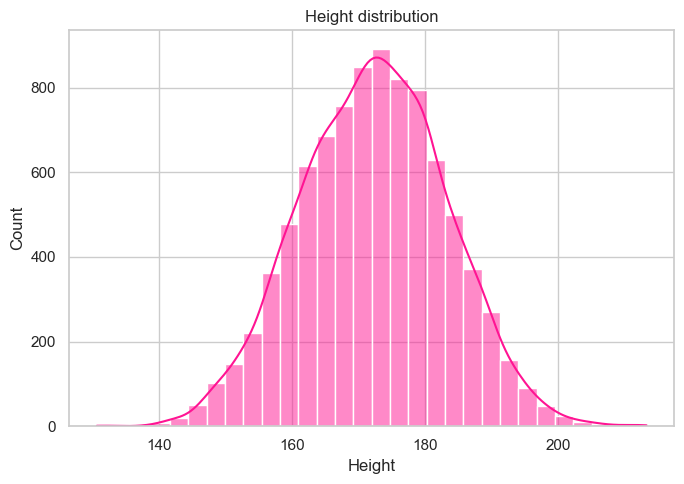

In [265]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Height', bins=30, color='deeppink', kde=True, stat='count')
plt.title('Height distribution', fontsize=12)
plt.tight_layout()
plt.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Heart Disease (target attribute)
</span>

In [266]:
df['HeartDisease'].value_counts()

HeartDisease
0    5020
1    3898
Name: count, dtype: int64

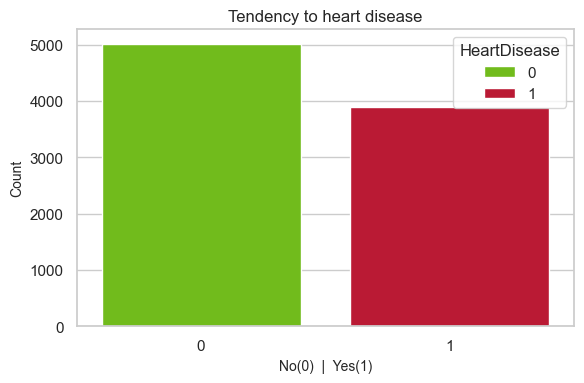

In [267]:
colors = ["#73d601", "#d40022"]
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', hue='HeartDisease', data=df, palette=colors, dodge=False, legend=True)
plt.title('Tendency to heart disease', fontsize=12)
plt.xlabel('No(0)  |  Yes(1)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

## Missing values
</span>

In [268]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
Race              0
Height            0
Weight            0
dtype: int64

In [269]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Race,Height,Weight
0,40.000000,M,ATA,140.000000,289.000000,0,Normal,172.000000,N,0.000000,Up,1,White,180.233238,100.825018
1,49.000000,F,NAP,160.000000,180.000000,0,Normal,156.000000,N,1.000000,Flat,0,White,173.975042,63.384922
2,37.000000,M,ATA,130.000000,283.000000,0,ST,98.000000,N,0.000000,Up,1,Hispanic,171.904901,83.027778
3,48.000000,F,ASY,138.000000,214.000000,0,Normal,108.000000,Y,1.500000,Flat,1,White,160.074206,66.458538
4,54.000000,M,NAP,150.000000,195.000000,0,Normal,122.000000,N,0.000000,Up,0,White,177.775159,84.033176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8913,74.348939,M,ASY,132.345049,265.740009,1,Normal,107.915513,N,2.050618,Flat,1,White,170.353192,83.396686
8914,56.593558,F,NAP,103.611499,100.000000,1,ST,83.143461,Y,0.640167,Flat,1,Asian,157.483662,70.929937
8915,45.634776,F,NAP,109.322571,185.269840,0,ST,104.331383,Y,0.200622,Flat,0,White,172.187920,101.653112
8916,69.096970,M,NAP,134.907200,238.968085,0,Normal,166.609687,Y,2.326140,Flat,1,Black,166.576961,58.821763


<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

## Outliers
</span>

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Graphs
</span>

In [270]:
def generate_boxplots(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    sns.set(style="whitegrid")
    for column in numeric_columns:
        plt.figure(figsize=(7, 4))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot de {column}')
        plt.xlabel(column)
        plt.show()

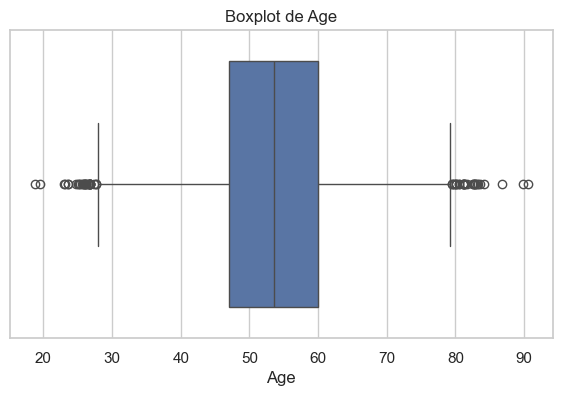

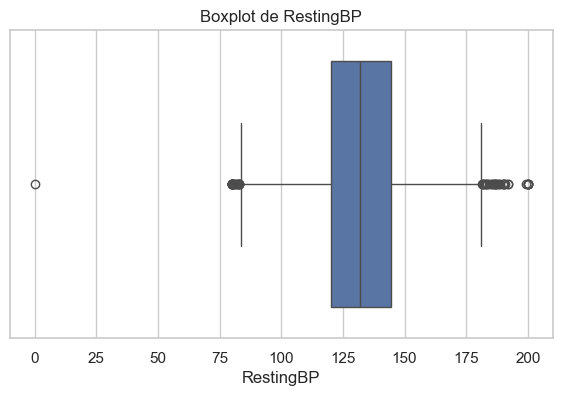

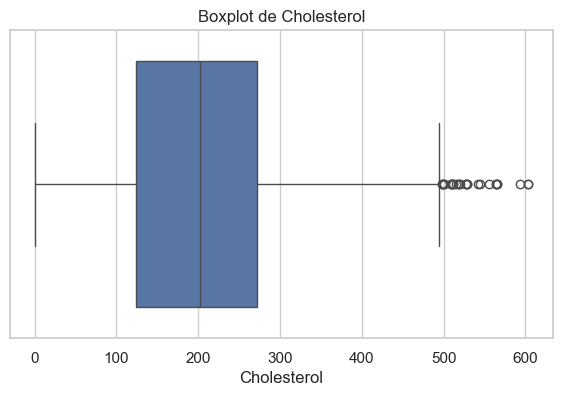

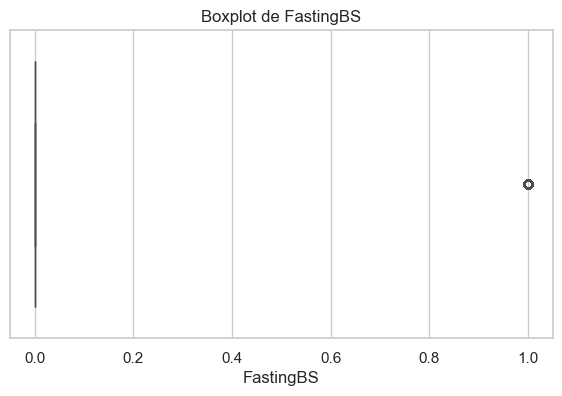

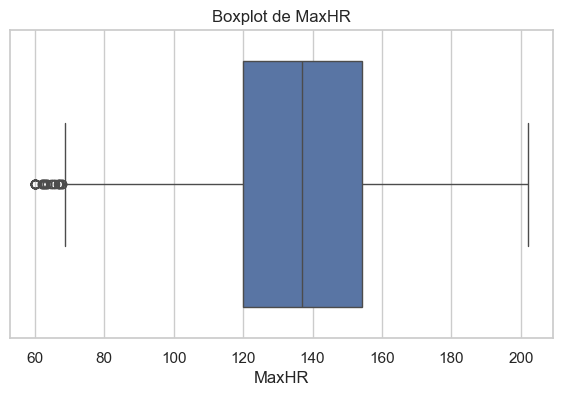

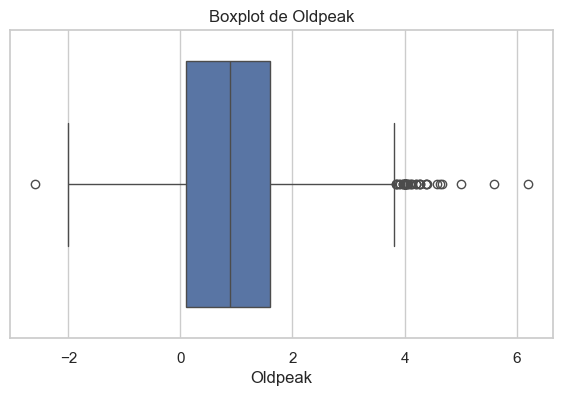

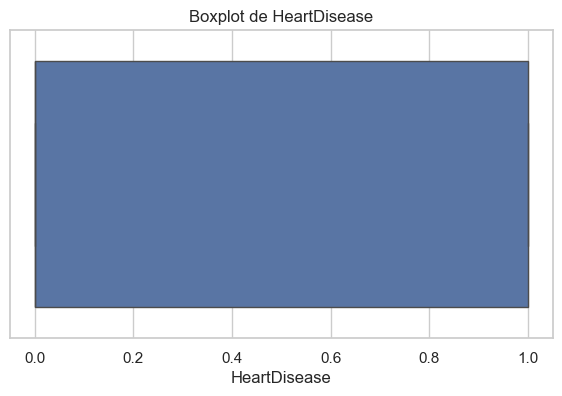

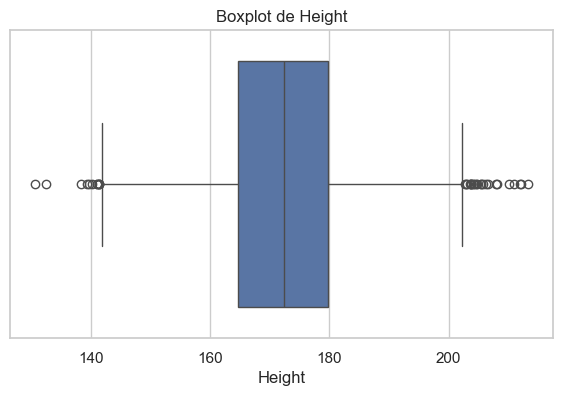

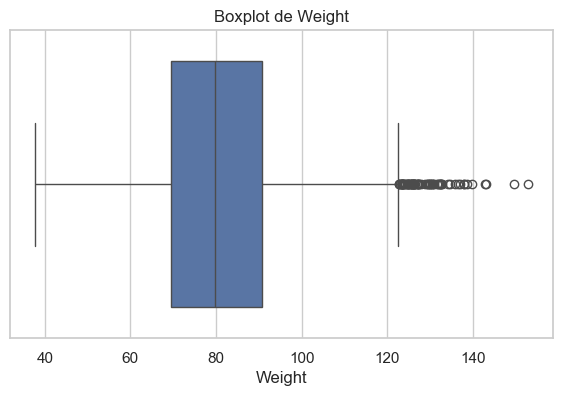

In [271]:
generate_boxplots(df)

<span style="font-family: Georgia, serif; font-weight: 100; letter-spacing: 0.8px;">

### Remove outliers
</span>

In [272]:
df = df.loc[df['RestingBP'] != 0]
df = df.loc[df['Cholesterol'] != 0]

In [273]:
df.shape

(8746, 15)

In [274]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Height,Weight
count,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000
mean,53.426606,132.347537,211.752333,0.222273,137.048370,1.000366,0.437228,172.246600,80.512666
std,9.499604,18.155185,91.553794,0.415797,25.475686,0.898654,0.496072,10.932972,15.749755
min,18.728715,80.000000,85.000000,0.000000,60.000000,-0.100000,0.000000,130.620798,37.626257
25%,47.000000,120.000000,129.200933,0.000000,120.000000,0.109331,0.000000,164.541251,69.406537
50%,53.487496,132.188459,204.000000,0.000000,137.476180,0.891822,0.000000,172.365112,79.751989
75%,59.842088,144.458523,273.621695,0.000000,154.581777,1.598502,1.000000,179.775891,90.722349
max,90.534422,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,213.297822,152.865006


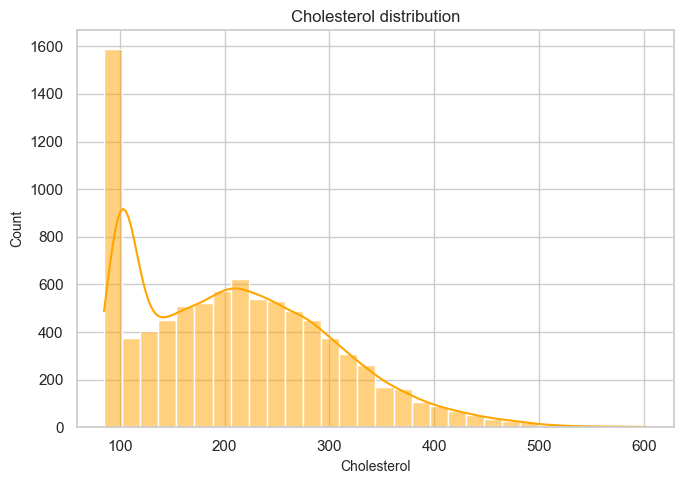

In [275]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Cholesterol', bins=30, color='orange', kde=True, stat='count')
plt.title('Cholesterol distribution', fontsize=12)
plt.xlabel('Cholesterol', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

In [276]:
df.to_csv('../data/classifier/processed/df.csv', index=False, sep = ';', encoding = 'ISO-8859-1')